# 빅데이터 분석 중간고사(B반)

## 201858036 박현수

### 1) np.linspace 함수와 같은 기능을 하는 함수 만들기

In [11]:
def equispaced(start, stop, num):
    a = (stop - start) / (num - 1)
    list1 = [start]
    b= start + a
    for i in range(num):
        list1.append(b)
        b += a
    return list1

equispaced(1, 8, 5)

[1, 2.75, 4.5, 6.25, 8.0, 9.75]

### 2) 주어진 n 에 대해 대각선 기준 아래는 1, 위는 0인 nxn 행렬 넘파이 배열로 반환

In [23]:
import numpy as np

def lower_triangle(n):
    triList=np.array([])
    for i in range(1, n):
        for j in range(i):
            triList=np.append(triList, np.array([1]))
        for k in range(n-i):
            triList=np.append(triList, np.array([0]))
 
    return triList.reshape(-n, n)

lower_triangle(5)

array([[1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0.]])

### 3) 0과 1 사이의 난수(seed = 0)으로 길이가 각각 50인 배열 x, y 만들고 산점도 작성, y=x 그래프 붉은 색으로 추가 

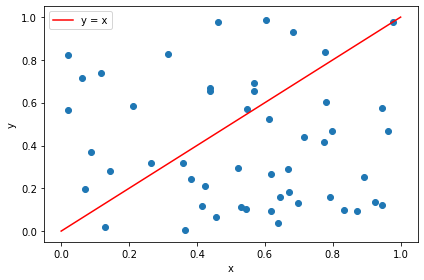

In [50]:
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.random(50)
y = np.random.random(50)

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
a = np.linspace(0, 1, 10)
b = np.linspace(0, 1, 10)
plt.plot(a, b, color='red', label= 'y = x')
plt.legend()
plt.tight_layout()

### 4) 다음 순서대로 작업을 수행하는 코드 작성

#### a) 0과 1 사이의 난수(seed=1) 생성하여 shape이 (10, 3)인 배열 a

In [56]:
np.random.seed(1)
a = np.random.random(30).reshape(10, 3)

#### b) 배열 a의 각 행의 합을 구하고, 코드로 행의 합이 가장 큰 행 번호를 구하기

In [73]:
tupleSum = np.sum(a, axis=0)

In [74]:
tupleSumMax = np.max(np.sum(a, axis=0))

#### c) {1, 2}에서 정수 난수(seed=2)를 생성, shape이 (10, )인 넘파이 배열 b

In [88]:
np.random.seed(2)
b = np.random.randint(1, 3, 10).reshape(10, )

#### d) 배열 b에 배열 a 붙여 넘파이 배열 c 만들기

In [93]:
a = a.reshape((10, 3))
b = b.reshape((10, 1))
c = np.concatenate([b, a], axis=1)

#### e) 배열 c에서 0번째 열의 값이 1인 행만 뽑아 만든 배열의 열 평균 구하기

In [96]:
np.mean(c[np.where(c[:, 0] == 1)], axis=0)

array([1.        , 0.43541342, 0.62206892, 0.31970205])

### 5) 순서대로 다음 작업을 수행하는 코드를 작성한 후 테스트 하시오.

#### a) Q5_a.csv 파일을 읽어 데이터 프레임 생성하기

In [121]:
import pandas as pd

Q5 = pd.read_csv('Q5_a.csv')

In [124]:
Q5

,Unnamed: 0,season,v1,v2,v3,v4,v5
0,0,winter,0.0,0.0,0.0,0.0,34.2
1,1,spring,1.4,7.6,4.8,1.9,6.7
2,2,autumn,3.3,53.6,1.9,0.0,0.0
3,3,spring,3.1,41.0,18.9,0.0,1.4
4,4,autumn,9.2,2.9,7.5,0.0,7.5
5,5,winter,15.1,14.6,1.4,0.0,22.5
6,6,summer,2.4,1.2,3.2,3.9,5.8
7,7,autumn,18.2,1.6,0.0,0.0,5.5
8,8,winter,25.4,5.4,2.5,0.0,0.0
9,9,winter,17.0,0.0,0.0,2.9,0.0


#### b) 데이터 프레임에서 숫자 데이터만 분리하여 넘파이 배열 만들기

In [135]:
locQ5 = np.array(Q5.loc[:, 'v1':])

#### c) season별 v1의 평균을 막대 그래프로 그리기

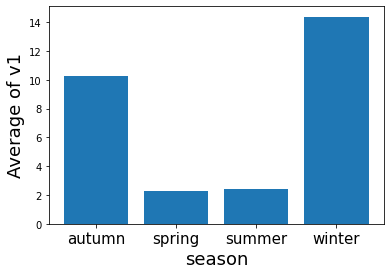

In [137]:
season_Avg = Q5.groupby('season').v1.mean()

label = ['autumn', 'spring', 'summer', 'winter']
index = np.arange(len(label))

plt.bar(index, season_Avg)
plt.xlabel('season', fontsize=18)
plt.ylabel('Average of v1', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.show()

#### d) a)의 데이터 프레임과 조인하기 

#### e) Q5_e.csv의 결측치를 칼럼 평균으로 채우기

In [143]:
Q5_e = pd.read_csv('Q5_e.csv')
Q5_e
Q5_eAvg = Q5_e.mean()

TypeError: Could not convert 88.158.48.38XXXXXXX7.67.297.687.97.96.65.66.56.47.83 to numeric